# PYTN_Assgn_3_5_Maulana Ridhwan Riziq

# Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date
(from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

- bank-additional.csv with 10% of the examples (4119), randomly selected from 1),
and 20 inputs.

- bank-full.csv with all examples and 17 inputs, ordered by date (older version of
this dataset with less inputs).

- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older
version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

Data Klien Bank:

1. age : usia (numerik)
2. job : jenis pekerjaan (kategorikal: 'admin','kerah biru','pengusaha','pembantu rumah tangga','manajemen','pensiunan','wiraswasta','jasa','pelajar','teknisi','pengangguran','tidak diketahui')
3. marital: status perkawinan (kategorikal: 'cerai','menikah','lajang','tidak diketahui'; catatan: 'cerai' berarti bercerai atau janda)
4. education: pendidikan (kategorisasi: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: apakah memiliki kredit macet? (kategorikal: 'tidak', 'ya', 'tidak diketahui')
6. housing: memiliki kredit perumahan? (kategorikal: 'tidak', 'ya', 'tidak diketahui')
7. Loan: memiliki pinjaman pribadi? (kategorikal: 'tidak', 'ya', 'tidak diketahui')

Terkait dengan Kontak Terakhir dari Kampanye Saat Ini:

8. contact: jenis komunikasi kontak (kategorikal: 'seluler', 'telepon')
9. month: bulan kontak terakhir dalam setahun (kategorikal: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: hari kontak terakhir dalam seminggu (kategorikal: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y='tidak').

Namun, durasi tidak diketahui sebelum panggilan dilakukan. Selain itu, setelah pemanggilan selesai, y baru diketahui dengan jelas. Dengan demikian, input ini hanya boleh disertakan untuk tujuan tolok ukur dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

Atribut Lainnya:

12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
13. pdays: jumlah hari yang telah berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya (angka; 999 berarti klien tidak dihubungi sebelumnya)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (angka)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (kategorikal: 'gagal', 'tidak ada', 'sukses')

Atribut Konteks Sosial dan Ekonomi

16. emp.var.rate: tingkat variasi ketenagakerjaan. indikator triwulanan (numerik)
17. cons.price.idx: indeks harga konsumen. indikator bulanan (numerik)
18. cons.conf.idx: indeks kepercayaan konsumen. indikator bulanan (numerik)
19. euribor3m: suku bunga euribor 3 bulan. indikator harian (numerik)
20. nr.employed: jumlah karyawan. indikator kuartalan (numerik)

Variabel Output (target yang diinginkan):

21. y. apakah klien berlangganan deposito berjangka? (biner: 'ya', 'tidak')

Dataset Link : https://archive.ics.uci.edu/dataset/222/bank+marketing

# Library and Dataset

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from six import StringIO
from IPython.display import Image
import sklearn.tree as DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [3]:
# "";" digunakan sebagai pemisah untuk nilai-nilai pada setiap baris dalam file tersebut.
bank = pd.read_csv("C:/Users/didan/bank-full.csv", sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Preprocessing

In [4]:
# Menampilkan ringkasan statistik deskriptif pada setiap kolom 
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# Rename column y menjadi column target
bank = bank.rename(columns={'y':'target'})
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
# Dimensi dataframe (baris, kolom)
bank.shape

(45211, 17)

In [7]:
# Jumlah data yang duplikat 
bank.duplicated().sum()

0

In [8]:
# Jumlah nilai yang hilang (null atau NaN) pada setiap kolom
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [10]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'target'],
      dtype=object)

In [11]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Visualization

Bagaimana keputusan client untuk bergabung dengan program berlangganan deposito berjangka ini?

In [12]:
# Melihat persentase jumlah masing-masing client terhadap program
dataclient = pd.DataFrame({"Total":bank['target'].value_counts(), 
                          "Presentase":(bank['target'].value_counts()/bank.shape[0])*100})
dataclient

,Total,Presentase
no,39922,88.30152
yes,5289,11.69848


Sebanyak 39922 client atau 88.3% dari total client memilih tidak bergabung dengan program, sedangkan 5289 client atau 11.7% dari total client memilih untuk bergabung pada program ini.

## Pie Chart

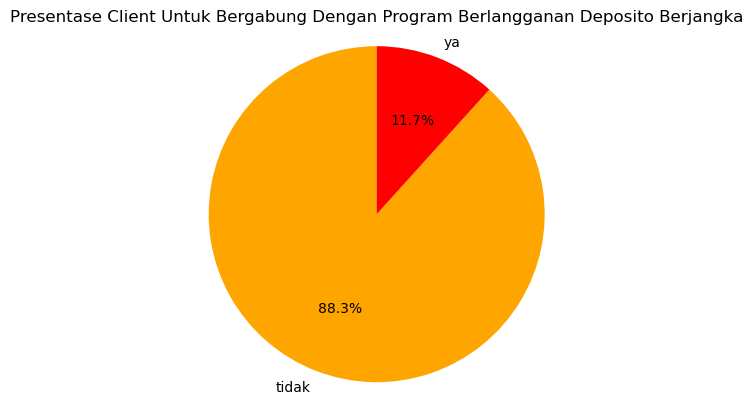

In [13]:
# Visualisasi data dengan pie chart
jumlah = dataclient['Total']
label = ['tidak','ya']
warna = ['orange','red'] 

plt.pie(jumlah, labels=label, autopct='%1.1f%%', startangle=90, colors=warna)
plt.axis('equal')
plt.title('Presentase Client Untuk Bergabung Dengan Program Berlangganan Deposito Berjangka')

plt.show()


Berdasarkan Pie Chart diatas sebesar 88.3% memilih tidak bergabung dengan program berlangganan deposito sedangkan 11.7% memilih bergabung.

## Histogram

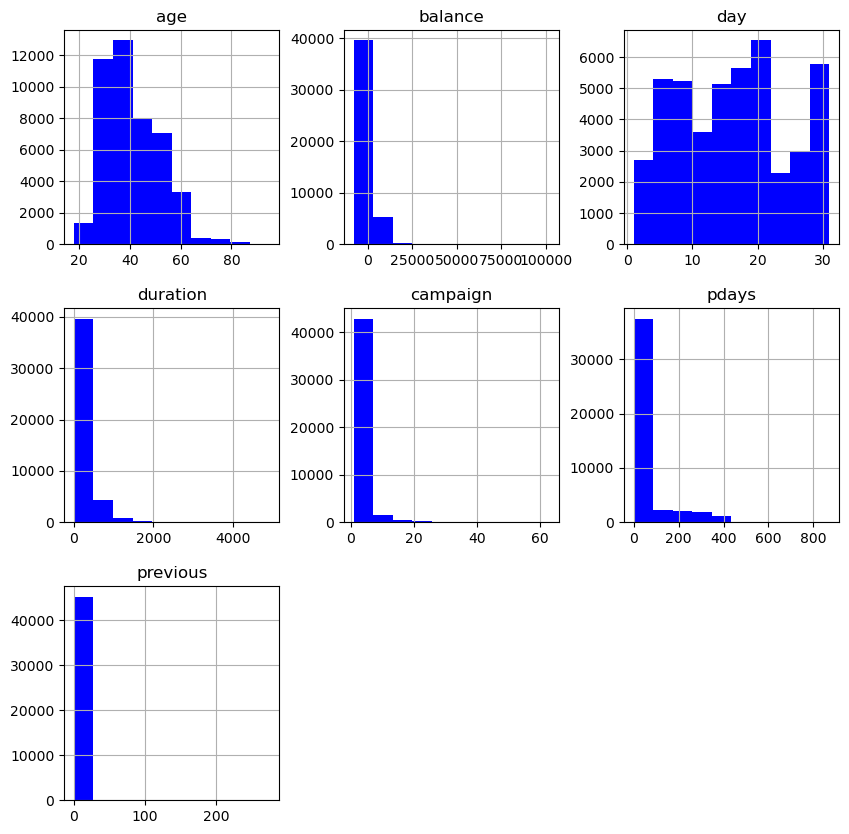

In [14]:
bank.hist(figsize=(10,10), color='blue')
plt.show()

- Age: client yang bergabung berada di umur 18-95 tahun
- Balance: nilai balance tertinggi yaitu 102127
- Day: dimulai dari tanggal 1-31
- Duration: durasi tertinggi adalah 4918
- Campaign: nilai terendah adalah 1
- Pdays: pdays tertinggi 871
- Previous: nilai tertinggi 275

### Encoding Data Columns

Mengubah tipe data menjadi numerik agar mempermudah

In [15]:
#creating labelEncoder

# preprocessing.LabelEncoder() digunakan untuk membuat objek LabelEncoder yang akan digunakan untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# mengambil tipe data object pada dataset dan di simpan di dfbank
df_category = bank.select_dtypes(include='object')
dfbank = bank.copy()

for column in df_category.columns:
    dfbank[column] = label_encoder.fit_transform(bank[column])

In [16]:
dfbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  target     45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [17]:
dfbank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


### Standardization

Kita perlu melakukan standardization atau standarisasi pada data diatas. Setiap nilai pada kolom-kolom numerik diubah menjadi skor Z, yaitu nilai yang dihitung dengan mengurangi rata-rata kolom dan kemudian membagi dengan standar deviasi kolom. Tujuan dari scaling adalah untuk menghasilkan distribusi nilai yang lebih normal, dengan nilai-nilai yang tidak terlalu jauh dari rata-rata sehingga mempermudah analisis data lebih lanjut.

In [18]:
# membuat objek StandardScaler utuk melakukan scaling pada setiap kolom numerik
scaler = preprocessing.StandardScaler()
scale_df = dfbank.copy()

# setiap kolom diubah nilainya dengan method fit_trasnform() dan hasilnya disimpan pada scale_df.
numeric_df = bank.select_dtypes(include=['int64','float64'])
for column in numeric_df.columns:
  scale_df[column] = scaler.fit_transform(bank[column].values.reshape(-1,1))

In [19]:
scale_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.25194,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.25194,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.25194,3,0


## Heatmap Plot

Jenis plot yang menunjukkan korelasi antara dua variabel dengan warna-warna yang berbeda. Pada heatmap, warna yang lebih terang menunjukkan korelasi yang lebih kuat, sementara warna yang lebih gelap menunjukkan korelasi yang lebih lemah.

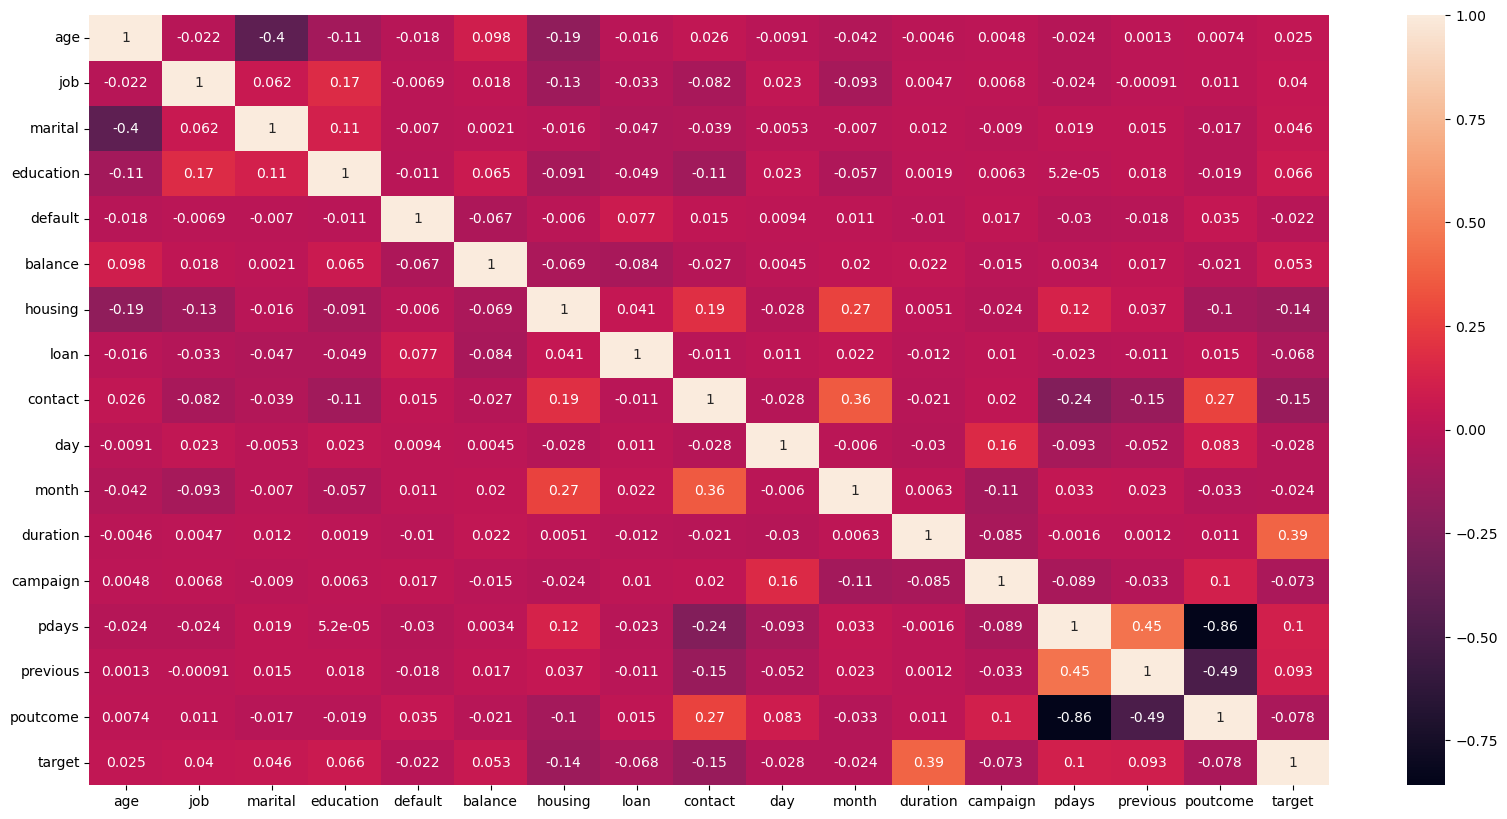

In [20]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(scale_df.corr(), annot=True)

Berdasarkan visualisasi di atas, apabila ada warna kotaknya lebih terang maka korelasinya lebih kuat, sementara warna yang lebih gelap menjunkan korelasi yang lemah. Dapat dilihat bahwa balance mempunyai hubungan linear positif yang sangat kuat dengan age jika dibandingkan yang lain.

In [21]:
# menghitung matriks korelasi antar kolom pada dataframe bankfull
scale_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


# Logistic Regression

Digunakan untuk menganalisis hubungan antara variabel dependen dan variabel independen, dan digunakan untuk memprediksi nilai probabilitas dari sebuah kejadian yang bersifat biner (ya atau tidak, benar atau salah, sukses atau gagal).

In [22]:
# test_size = 0.30 artinya data testing 30% dan data training 70%
# random_state = 1 digunakan untuk menspesifikasikan random seed pada saat pembagian data training dan data testing

X = scale_df.drop('target', axis=1)
y = scale_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =1)


X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6149,-0.841558,1,1,1,1,-0.525587,1,0,2,1.344997,8,0.655614,-0.569351,-0.411453,-0.251940,3
12403,-0.653211,0,2,1,0,-0.604412,1,1,2,1.344997,6,-0.571452,0.399020,-0.411453,-0.251940,3
21645,-0.841558,9,1,1,0,-0.360055,1,0,0,0.383734,1,-0.350114,-0.246560,-0.411453,-0.251940,3
29580,-0.464863,1,1,1,1,-0.443150,0,1,0,-1.538792,3,-0.420010,0.399020,-0.411453,-0.251940,3
31245,-1.689124,8,2,1,0,-0.287799,0,0,0,-1.538792,7,-0.664647,-0.569351,-0.411453,-0.251940,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.853573,9,1,2,0,0.153619,0,0,0,-0.217055,8,0.232354,0.076230,-0.411453,-0.251940,3
32511,-0.653211,4,0,2,0,-0.274005,1,0,0,0.143418,0,-0.097711,-0.246560,-0.411453,-0.251940,3
5192,0.665225,4,1,2,0,0.929056,0,0,2,0.624050,8,0.407094,1.044601,-0.411453,-0.251940,3
12172,0.382703,0,1,3,0,0.138182,0,0,2,0.503892,6,-0.959764,2.658552,-0.411453,-0.251940,3


In [23]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3610,0.100181,1,1,0,0,0.379911,1,0,2,-0.096898,8,0.014899,0.399020,-0.411453,-0.251940,3
11677,-0.370689,9,1,1,0,0.278096,0,0,2,0.503892,6,-0.353997,-0.246560,-0.411453,-0.251940,3
33018,-0.841558,0,1,1,0,-0.144273,1,0,0,0.143418,0,2.177796,0.399020,-0.411453,-0.251940,3
44323,1.136095,1,1,0,0,-0.346918,0,0,0,1.465155,5,0.504172,0.076230,1.406227,0.182198,2
8119,-0.841558,9,2,2,0,-0.363011,1,0,2,-1.658950,6,-0.291867,0.721811,-0.411453,-0.251940,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10811,-0.182341,0,1,1,0,0.173653,0,0,2,0.143418,6,-0.431659,-0.569351,-0.411453,-0.251940,3
28752,0.571051,10,2,2,0,0.373671,0,0,0,1.705471,4,-0.070529,-0.569351,-0.411453,-0.251940,3
22657,-0.935732,4,2,2,0,-0.447419,0,0,0,1.104681,1,-0.260802,0.721811,-0.411453,-0.251940,3
12529,0.853573,4,1,1,0,-0.445777,0,0,2,-1.538792,5,-0.909283,-0.569351,-0.411453,-0.251940,3


In [24]:
y_train

6149     0
12403    0
21645    0
29580    0
31245    0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: target, Length: 31647, dtype: int32

In [25]:
y_test

3610     0
11677    0
33018    0
44323    1
8119     0
        ..
10811    0
28752    0
22657    0
12529    0
44850    1
Name: target, Length: 13564, dtype: int32

In [26]:
# Membuat objek Logistic Regression
lr = LogisticRegression()

# Melatih model pada data training
lr.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
lrpred = lr.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracylr = accuracy_score(y_test, lrpred)
print("Akurasi Logistic Regression:", accuracylr)

Akurasi Logistic Regression: 0.8910350928929519


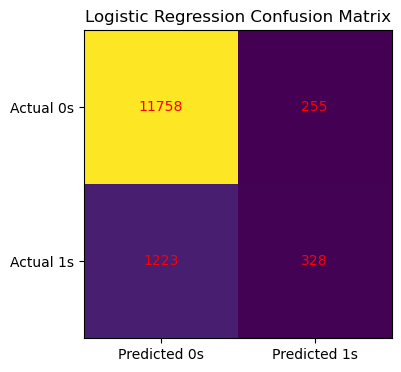

In [30]:
#  Confusion Matrix
cm = confusion_matrix(y_test, lrpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Logistic Regression Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 328, FP = 255, FN = 1223, TN = 11758

In [31]:
print(classification_report(y_test, lrpred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.62     13564
weighted avg       0.87      0.89      0.87     13564



Dapat dilihat bahwa model memiliki precision yang cukup rendah untuk kelas 1 (bergabung) dan recall yang rendah. Namun, model memiliki nilai accuracy yang cukup baik, yaitu 0.89.

# SVM (Support Vector Machine)

Mencari sebuah hyperplane (bidang) yang terbaik memisahkan dua kelas pada data training dengan margin terbesar yang mungkin. Margin adalah jarak antara hyperplane dengan titik-titik terdekat dari kedua kelas.

In [39]:
# Membuat objek SVM
svm = SVC(kernel='linear')

# Melatih model pada data training
svm.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
svmpred = svm.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracysvm = accuracy_score(y_test, svmpred)
print("Akurasi SVM:", accuracysvm)

Akurasi SVM: 0.8856531996461221


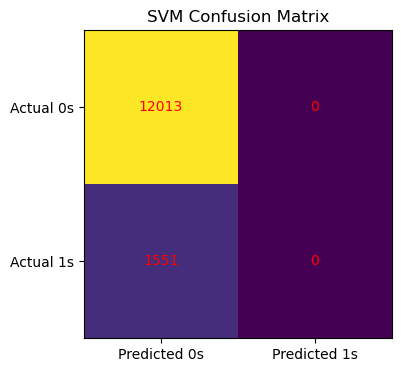

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, svmpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("SVM Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 0, FP = 0, FN = 1551, TN = 12013

In [42]:
print(classification_report(y_test, svmpred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.00      0.00      0.00      1551

    accuracy                           0.89     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.89      0.83     13564



dikarenakan nilai True Positives (TP) dan False Positives (FP) sama-sama nol, maka precision tidak dapat dihitung dan hasilnya tidak terdefinisi (undefined).

Dapat dilihat bahwa model memiliki precision yang cukup rendah untuk kelas 1 (bergabung) dan recall yang rendah. Namun, model memiliki nilai accuracy yang cukup baik, yaitu 0.89.

# Decision Tree

Algoritma ini menghasilkan sebuah struktur pohon yang dapat digunakan untuk mengambil keputusan dengan menganalisis fitur-fitur pada data. Pada decision tree, setiap node pada pohon merepresentasikan sebuah fitur, sedangkan cabang-cabang pada node merepresentasikan kemungkinan nilai dari fitur tersebut. Node daun pada pohon merepresentasikan kelas atau nilai target.

In [43]:
from sklearn.tree import DecisionTreeClassifier
# Membuat objek Decision Tree
dtc = DecisionTreeClassifier()

# Melatih model pada data training
dtc.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
dtcpred = dtc.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracydtc = accuracy_score(y_test, dtcpred)
print("Akurasi Decision Tree:", accuracydtc)

Akurasi Decision Tree: 0.8704659392509584


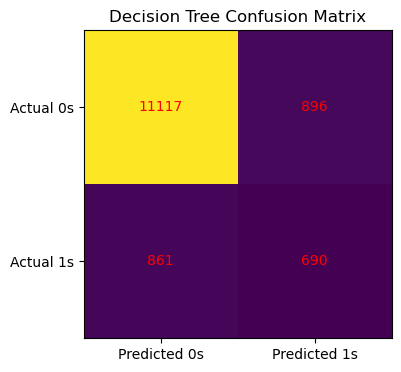

In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, dtcpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Decision Tree Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 708, FP = 902, FN = 843, TN = 11111

In [50]:
print(classification_report(y_test, dtcpred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.44      0.44      0.44      1551

    accuracy                           0.87     13564
   macro avg       0.68      0.69      0.68     13564
weighted avg       0.87      0.87      0.87     13564



Dari evaluasi tersebut, dapat dilihat bahwa model memiliki precision yang cukup rendah untuk kelas 1 (bergabung) dan recall yang rendah. Namun, model memiliki nilai accuracy yang cukup baik, yaitu 0.87.

# Random Forest

Algoritma ini membangun beberapa pohon keputusan (decision tree) secara acak pada dataset dan kemudian menggabungkan hasil prediksi dari masing-masing pohon untuk menghasilkan prediksi akhir.

In [51]:
# Membuat objek DRandom Forest dengan n_estimators=100
rf = RandomForestClassifier(n_estimators=100)

# Melatih model pada data training
rf.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
rfpred = rf.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracyrf = accuracy_score(y_test, rfpred)
print("Akurasi Random Forest:", accuracyrf)

Akurasi Random Forest: 0.90555883220289


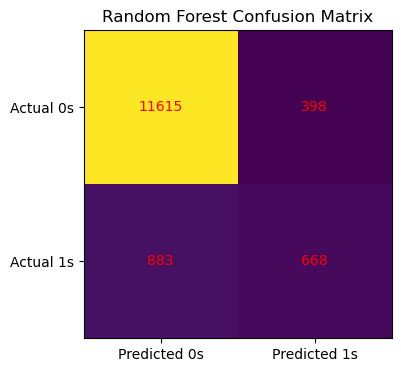

In [52]:
# Confusion Matrix

cm = confusion_matrix(y_test, rfpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Random Forest Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 685, FP = 392, FN = 913, TN = 11574

In [53]:
print(classification_report(y_test, rfpred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.63      0.43      0.51      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.89      0.91      0.90     13564



dapat dilihat bahwa model memiliki precision yang cukup rendah untuk kelas 1 (bergabung) dan recall yang rendah. Namun, model memiliki nilai accuracy yang cukup baik, yaitu 0.90.

# Naive Bayes

Memanfaatkan teorema Bayes untuk menghitung probabilitas dari setiap kelas berdasarkan atribut yang ada pada data.

In [54]:
# Membuat objek naive bayes
nb = GaussianNB()

# Melatih model pada data training
nb.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
nbpred = nb.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracynb = accuracy_score(y_test, nbpred)
print("Akurasi Naive Bayes:", accuracynb)

Akurasi Naive Bayes: 0.8347832497788263


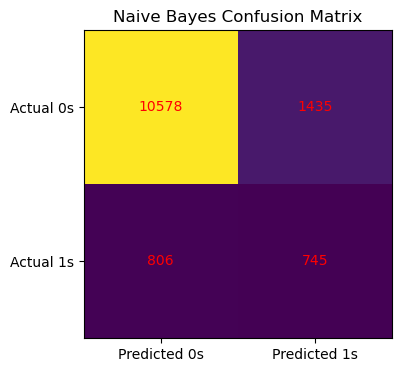

In [55]:
# Confusion Matrix

cm = confusion_matrix(y_test, nbpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Naive Bayes Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 754, FP = 1492, FN = 844, TN = 10474

In [56]:
print(classification_report(y_test, nbpred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     12013
           1       0.34      0.48      0.40      1551

    accuracy                           0.83     13564
   macro avg       0.64      0.68      0.65     13564
weighted avg       0.86      0.83      0.85     13564



In [57]:
bank['target'].value_counts()

no     39922
yes     5289
Name: target, dtype: int64

# Overall Analysis

In [59]:
print('Hasil beberapa akurasi dari model machine learning:')
print('Akurasi Logistic Regression:', accuracylr)
print('Akurasi Support Vector Machine:', accuracysvm)
print('Akurasi Decision Tree:', accuracydtc)
print('Akurasi Random Forest:', accuracyrf)
print('Akurasi Naive Bayes:', accuracynb)

Hasil beberapa akurasi dari model machine learning:
Akurasi Logistic Regression: 0.8910350928929519
Akurasi Support Vector Machine: 0.8856531996461221
Akurasi Decision Tree: 0.8704659392509584
Akurasi Random Forest: 0.90555883220289
Akurasi Naive Bayes: 0.8347832497788263


- Sebanyak 39922 jumlah client belum menjadi nasabah dan 5289 client sudah menjadi nasabah di bank tersebut.
- Hasil akurasi algoritma yang paling sesuai untuk memprediksi apakah klien akan berlangganan atau tidak adalah algoritma Random Forest dikarenakan nilai akurasinya 90%.